# Part-1 : To develop your version K-Means using the algorithm
- Implemented my version of K-Means in KMeans.py file
- References: https://towardsdatascience.com/the-math-and-code-behind-k-means-clustering-795582423666

# 1. Import required libraries
- Importing all the necessary libraries required

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from KMeans import KMeans
from sklearn.datasets import make_blobs

# 2. Input data
- These data points represent coordinates in a 2D space.
- The goal is to apply the K-Means algorithm to cluster these points into distinct groups.
- Each sublist in X corresponds to the (x, y) coordinates of an instance.
- This sample data has 8 instances for demonstration purposes.

In [ ]:
X = [[0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10]]

# 3. Applying K-Means Clustering
- Initializing a KMeans object with k=2, indicating the desired number of clusters.
- Performing K-Means clustering on the dataset X.
- The result includes cluster labels assigned to each data point (cluster_labels)
  and the coordinates of the cluster centroids (centroids).

In [ ]:
kmeans = KMeans(k=2)
labels, centroids = kmeans.fit(X)

# 4. Expected output
- Printing the expected cluster labels for the given dataset X.
- Printing the expected coordinates of cluster centroids after K-Means clustering.

In [ ]:
expected_labels = [0, 0, 0, 0, 1, 1, 1, 1]
expected_centroids = [[1, 1], [9, 9]]

print("Expected lables:", expected_labels)
print("Expected centroids:", expected_centroids)

# Part-2 : Performance Analysis

# 1. Generating My Cluster Assignments
- Using make_blobs to generate 700 instances of data points with 4 clusters in 2-dimensional space.
- Parameters: n_samples=700 (number of instances), centers=4 (number of clusters),
  cluster_std=0.60 (standard deviation of each cluster), random_state=0 (seed for reproducibility).
- Displaying the generated data points in X.

In [5]:
X, My_cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

# 2. Printing cluster_assignments

In [6]:
My_cluster_assignments

array([3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 3, 1, 2, 0, 0, 3, 1, 3, 1, 1,
       2, 1, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 1, 3, 3, 1, 1, 0, 0, 1, 1, 2,
       1, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 2, 1, 3, 0, 1, 2, 1, 2, 2, 3, 0,
       1, 2, 1, 1, 3, 1, 3, 3, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 3, 0, 2,
       0, 2, 3, 3, 0, 3, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 3, 3, 2, 2, 0, 1, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3,
       2, 1, 0, 3, 3, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 3, 2, 1, 0, 2, 0, 1,
       0, 3, 3, 1, 0, 2, 3, 0, 0, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 3, 2, 2,
       2, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 3, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1,
       0, 3, 1, 3, 3, 2, 0, 1, 1, 0, 3, 3, 3, 3, 0, 2, 3, 1, 1, 3, 0, 3,
       3, 0, 0, 1, 1, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 0, 3, 3, 3, 2, 0, 2,
       2, 3, 3, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 3, 3, 1, 1, 2, 1, 1, 3, 0, 1, 3, 2, 0, 0,

# 3. My custom KMeans implementation
- Applying K-Means clustering with k=4 to the dataset X.
- Displaying the coordinates of cluster centroids after clustering.

In [7]:
kmeans = KMeans(k=4)
labels, centroids = kmeans.fit(X)
centroids

[[0.9004393234899268, 4.32217463716],
 [1.9877063026473274, 0.8318857877497887],
 [-1.2040579337244177, 7.837858432492295],
 [-1.4997094181421273, 2.905741940858995]]

# 4.Scikit-learn KMeans implementation
- Importing necessary library
- Applying K-Means clustering with k=4 to the dataset X.
- Displaying the kmeans_sklearn after clustering.

In [8]:
from sklearn.cluster import KMeans
kmeans_sklearn = KMeans(n_clusters=4, random_state=0)
sklearn_cluster_assignments = kmeans_sklearn.fit_predict(X)

# 5. Comparison of Cluster Assignments: Custom KMeans vs. Scikit-learn KMeans vs. Actual Clusters
- Creating a 12x4 figure.
- Setting up a 1x3 grid.
- Actual clusters, color-coded by My_cluster_assignments.
- My KMeans clusters, color-coded by your custom assignments.
- Scikit-learn KMeans clusters, color-coded by scikit-learn assignments.
- Displaying the figure with three subplots.

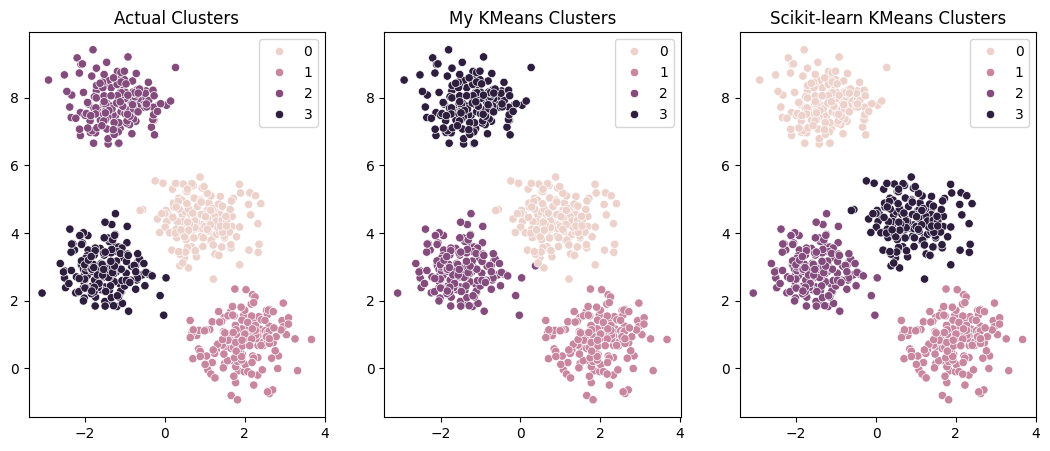

In [9]:
plt.figure(figsize=(13, 5))

# Plot for 'labels'
plt.subplot(1, 3, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.title('Actual Clusters')
plt.legend()

# Plot for 'My_cluster_assignments'
plt.subplot(1, 3, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=My_cluster_assignments)
plt.title('My KMeans Clusters')
plt.legend()

# Plot for 'sklearn_cluster_assignments'
plt.subplot(1, 3, 3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=sklearn_cluster_assignments)
plt.title('Scikit-learn KMeans Clusters')
plt.legend()

plt.show()

# 6. Comparison of Cluster Assignments

In [10]:
comparison_my_vs_actual = np.sum(My_cluster_assignments == labels) / len(labels)
comparison_my_vs_sklearn = np.sum(My_cluster_assignments == sklearn_cluster_assignments) / len(sklearn_cluster_assignments)

print(f"Comparison (My KMeans vs Actual): {comparison_my_vs_actual:.2%}")
print(f"Comparison (My KMeans vs Scikit-learn KMeans): {comparison_my_vs_sklearn:.2%}")

Comparison (My KMeans vs Actual): 50.00%
Comparison (My KMeans vs Scikit-learn KMeans): 49.86%


# 7. V-Measure Comparison Between Custom K-Means and Scikit-Learn K-Means
- Calculating and printing the V-Measure scores and a metric for clustering evaluation.
- Comparing the clustering results of a custom K-Means implementation.

In [11]:
from sklearn.metrics import v_measure_score
v_measure_my_kmeans = v_measure_score(My_cluster_assignments, labels)
v_measure_sklearn_kmeans = v_measure_score(My_cluster_assignments,sklearn_cluster_assignments)
print(f'V-Measure (My custom K-Means): {v_measure_my_kmeans}')
print(f'V-Measure (Scikit-Learn K-Means): {v_measure_sklearn_kmeans}')

V-Measure (My custom K-Means): 0.9936471967946069
V-Measure (Scikit-Learn K-Means): 0.993647196794607


# Part-3.1 : Demonstration of Clustering Algorithms on Chicago Dataset

# 1. Fetching Chicago taxi data
- Observed that the dataframe has 101,788 entries, ranging from index 0 to 101,787.

In [12]:
chicago_taxi_df = pd.read_csv('Taxi_Trips__2013-2023_.csv')
chicago_taxi_df = chicago_taxi_df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]
chicago_taxi_df

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308
101786,41.980264,-87.913625


# 2. Displaying information about the Chicago Taxi DataFrame
- Observed that both columns are of the float64 data type.
- "Pickup Centroid Latitude" and "Pickup Centroid Longitude" have 95,657 non-null entries each, indicating the number of non-missing values.

In [13]:
chicago_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pickup Centroid Latitude   95657 non-null  float64
 1   Pickup Centroid Longitude  95657 non-null  float64
dtypes: float64(2)
memory usage: 1.6 MB


# 3.  Descriptive Statistics for Chicago Taxi Data
- Observed that he latitude values range from approximately 41.66 to 42.02, covering a span of about 0.36 degrees.
- The longitude values range from approximately -87.91 to -87.53, covering a span of about 0.38 degrees.

In [14]:
chicago_taxi_df.describe()

,Pickup Centroid Latitude,Pickup Centroid Longitude
count,95657.000000,95657.000000
mean,41.898703,-87.689956
std,0.064621,0.104274
min,41.660136,-87.913625
25%,41.878866,-87.695013
50%,41.895033,-87.642649
75%,41.949829,-87.626211
max,42.015934,-87.534903


# 4.  Distribution Comparison of Pickup Centroid Latitude and Longitude
- The data has a relatively small spread around the mean, with a standard deviation of 0.06 for latitude.
- The distribution looks somewhat symmetrical, as the mean and median are close for latitude.
- The data has a moderate spread around the mean, with a standard deviation of 0.10 for longitude.
- The distribution looks somewhat symmetrical, as the mean and median are close fpr longitude.

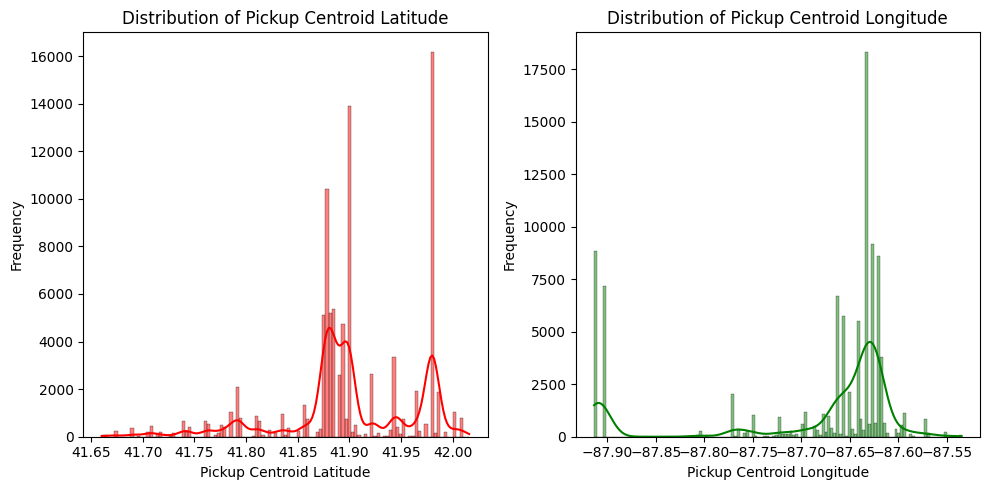

In [15]:
plt.figure(figsize=(10, 5))

# Plot for 'Pickup Centroid Latitude'
plt.subplot(1, 2, 1)
sns.histplot(chicago_taxi_df['Pickup Centroid Latitude'], kde=True, color='red')
plt.xlabel('Pickup Centroid Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Pickup Centroid Latitude')

# Plot for 'Pickup Centroid Longitude'
plt.subplot(1, 2, 2)
sns.histplot(chicago_taxi_df['Pickup Centroid Longitude'], kde=True, color='green')
plt.xlabel('Pickup Centroid Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Pickup Centroid Longitude')

plt.tight_layout()

plt.show()

# 5. Correlation Heatmap for Chicago Taxi Data

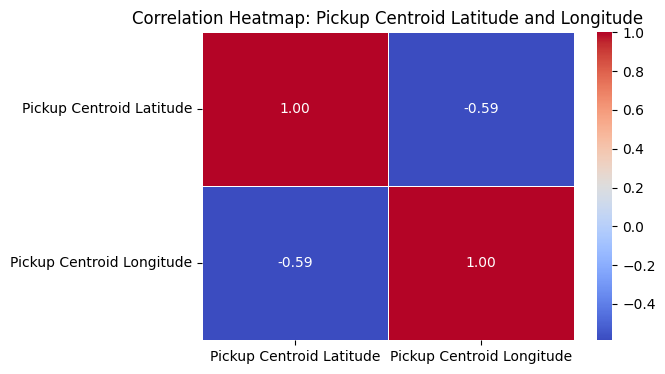

In [16]:
heatmap_data = chicago_taxi_df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]
correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Pickup Centroid Latitude and Longitude')
plt.show()

# 6. Scatter Plot 

<Axes: xlabel='Pickup Centroid Latitude', ylabel='Pickup Centroid Longitude'>

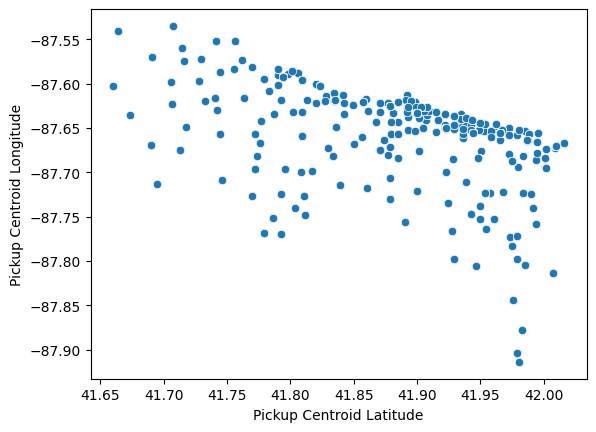

In [17]:
sns.scatterplot(data=chicago_taxi_df, x=chicago_taxi_df['Pickup Centroid Latitude'], y=chicago_taxi_df['Pickup Centroid Longitude'])

# 7. Checking for undefined values in dataframe

In [18]:
chicago_taxi_df.isnull().sum()

Pickup Centroid Latitude     6131
Pickup Centroid Longitude    6131
dtype: int64

# 8. Cleaning the dataframe
- Cleaning the dataframe by remvoing undefind values

In [19]:
cleaned_taxi_df = chicago_taxi_df.dropna(inplace=True)
cleaned_taxi_df

# 9. Standardize the features
- Importing StandardScaler
- Extracting features 'Pickup Centroid Latitude', 'Pickup Centroid Longitude'

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_taxi = scaler.fit_transform(chicago_taxi_df)

# 10. Answers for questions mentioned in assignment pdf
- I chose k-means for its simplicity and efficiency in handling numerical data, suitable for exploratory clustering.
- Handled missing values, standardized features using StandardScaler, and determined k through iterative experimentation as a part f pre-   processing
- Will give Visual representation of  k-means output with a scatter plot, color-coding data points by assigned clusters below.
- Will use silhouette score and Davies-Bouldin index; results align with expectations, providing valuable insights for further analysis.

# 11. Applying K-Means on Chicago taxi data

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_taxi)
kmeans_score = silhouette_score(df_taxi, kmeans_labels)
kmeans.fit(df_taxi)

KMeans(n_clusters=4, random_state=42)

# 12. Applying DBSCAN on Chicago taxi data

In [22]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_taxi)
dbscan_score = silhouette_score(df_taxi, dbscan_labels)

# 13. Applying Hierarchical on Chicago taxi data

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_taxi)
hierarchical_score = silhouette_score(df_taxi, hierarchical_labels)

# 14. Visualization of K-Means, DBSCAn and Hierarchical
- Applying the k-means algorithm, DBSCAN and Hierarchical to preprocessed Chicago taxi data with scaled features.
- Visualizing the resulting clusters on a scatter plots, where each data point is color-coded based on its assigned cluster.

In [ ]:
plt.scatter(df_taxi['Pickup Centroid Longitude'], df_taxi['Pickup Centroid Latitude'], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title('K-Means Clusters')
plt.xlabel('Pickup Centroid Longitude')
plt.ylabel('Pickup Centroid Latitude')
plt.show()

In [ ]:
Kmeans_my_balanced = KMeans(k=4,balanced=True)
Kmeans_my_balanced.fit(X)